# Osnovne statistike

*Osnovne statistike o podatkih o živalih iz zavetišča horjul.*

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [49]:
zivali = pd.read_csv('zivali.csv')

## Število dni preživetih v zavetišču za posamezno žival

In [50]:
st_dni = []
animals = [] 
for id in zivali['id'].unique():
    datum_sprejema_str = zivali.loc[zivali['id'] == id, 'datum_sprejema'].iloc[0]
    datum_oddaje_str = zivali.loc[zivali['id'] == id, 'datum_oddaje'].iloc[0]
    #convertam string v date če niso NaN ali x
    if pd.notna(datum_sprejema_str) and pd.notna(datum_oddaje_str) and datum_sprejema_str != 'x' and datum_oddaje_str != 'x':
        datum_sprejema = datetime.strptime(datum_sprejema_str, "%d/%m/%Y")
        datum_oddaje = datetime.strptime(datum_oddaje_str, "%d/%m/%Y")
        #zračunam število dni v zavetišču in appendam
        st_dni_v_zavetiscu = (datum_oddaje - datum_sprejema).days
        #dodan pogoj ker je par podatkov čudnih
        if st_dni_v_zavetiscu > 0:
            animals.append(id)
            st_dni.append(st_dni_v_zavetiscu)

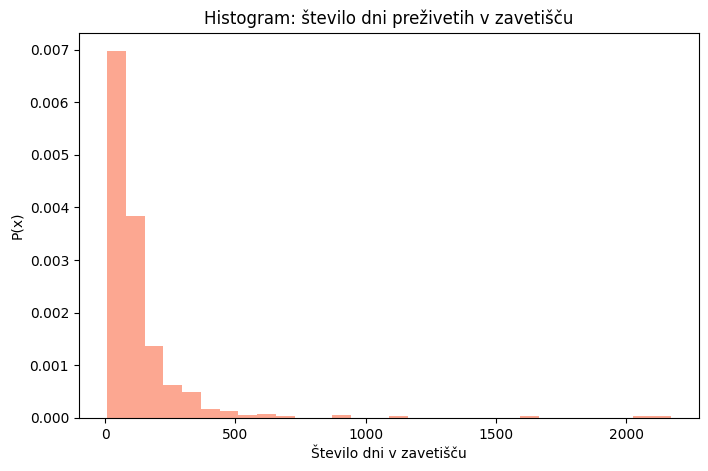

Povprečno število dni preživetih v zavetišču: 125.17825311942958


In [51]:
#narišem histogram
plt.figure(figsize=(8, 5))
plt.hist(st_dni, bins=30, density=True, alpha=0.6, color='#FB6D48')
plt.title("Histogram: število dni preživetih v zavetišču")
plt.xlabel("Število dni v zavetišču")
plt.ylabel("P(x)")
plt.show()
print("Povprečno število dni preživetih v zavetišču: " + str(np.mean(st_dni)))

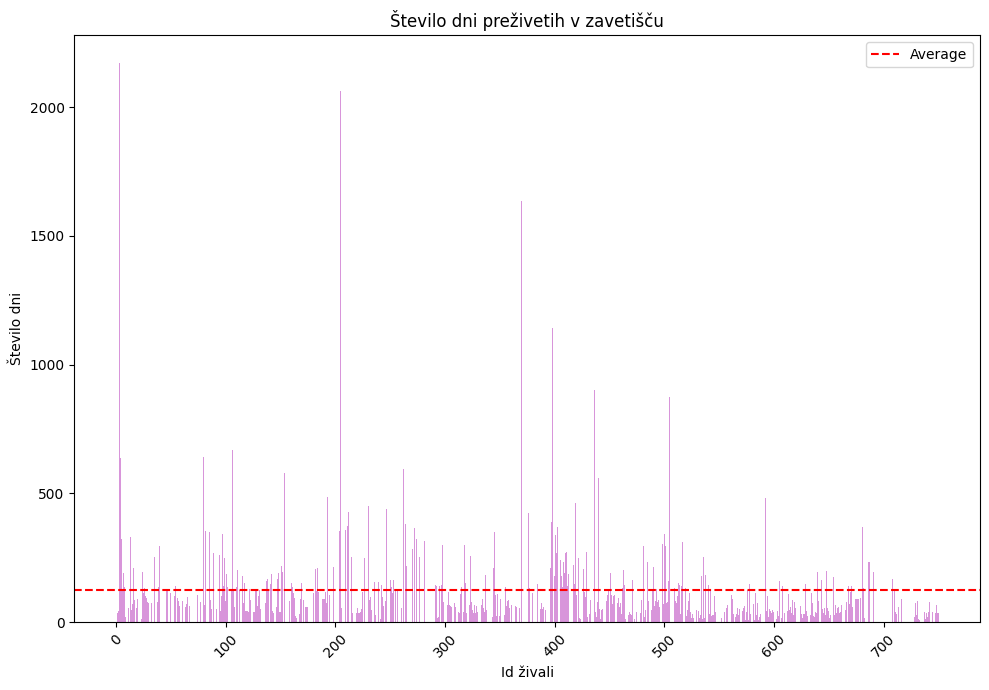

In [52]:
povp_dni = np.mean(st_dni)

plt.figure(figsize=(10, 7))
plt.bar(animals, st_dni, color='#D895DA')
plt.axhline(y=povp_dni, color='r', linestyle='--', label='Average')  #horizontalna črta za povprečje
plt.xlabel('Id živali')
plt.ylabel('Število dni')
plt.title("Število dni preživetih v zavetišču")
plt.xticks(rotation=45)  
plt.legend()  
plt.tight_layout() 
plt.show()
